In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/Dataset/Train'
test_path = '/content/drive/MyDrive/Dataset/Dataset/Test'

In [3]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/Dataset/Train/*')

In [4]:
folders

['/content/drive/MyDrive/Dataset/Dataset/Train/200',
 '/content/drive/MyDrive/Dataset/Dataset/Train/10',
 '/content/drive/MyDrive/Dataset/Dataset/Train/5',
 '/content/drive/MyDrive/Dataset/Dataset/Train/50',
 '/content/drive/MyDrive/Dataset/Dataset/Train/100',
 '/content/drive/MyDrive/Dataset/Dataset/Train/20']

In [5]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 6, activation = 'softmax'))

In [6]:
# tell the model what cost and optimization method to use
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [7]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [8]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 211 images belonging to 6 classes.


In [9]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 51 images belonging to 6 classes.


In [10]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
7/7 [==============================] - 85s 12s/step - loss: 9.2917 - accuracy: 0.1874 - val_loss: 2.2859 - val_accuracy: 0.1373
Epoch 2/50
7/7 [==============================] - 17s 2s/step - loss: 2.0839 - accuracy: 0.1269 - val_loss: 1.7960 - val_accuracy: 0.1765
Epoch 3/50
7/7 [==============================] - 17s 2s/step - loss: 1.7889 - accuracy: 0.1624 - val_loss: 1.7889 - val_accuracy: 0.1569
Epoch 4/50
7/7 [==============================] - 17s 3s/step - loss: 1.7867 - accuracy: 0.2764 - val_loss: 1.7618 - val_accuracy: 0.2549
Epoch 5/50
7/7 [==============================] - 17s 2s/step - loss: 1.7749 - accuracy: 0.2493 - val_loss: 1.7621 - val_accuracy: 0.3333
Epoch 6/50
7/7 [==============================] - 17s 2s/step - loss: 1.7182 - accuracy: 0.4200 - val_loss: 1.5601 - val_accuracy: 0.4314
Epoch 7/50
7/7 [==============================] - 17s 2s/step - loss: 1.6548 - accuracy: 0.3474 - val_loss: 1.6250 - val_accuracy: 0.4314
Epoch 8/50
7/7 [=================

In [11]:
r.history

{'accuracy': [0.16587677597999573,
  0.14691942930221558,
  0.18483412265777588,
  0.24170616269111633,
  0.34597155451774597,
  0.40758293867111206,
  0.33175355195999146,
  0.5402843356132507,
  0.5260663628578186,
  0.6018957495689392,
  0.6777251362800598,
  0.7488151788711548,
  0.7203791737556458,
  0.8056871891021729,
  0.7772511839866638,
  0.8199052214622498,
  0.8862559199333191,
  0.8767772316932678,
  0.8815165758132935,
  0.900473952293396,
  0.900473952293396,
  0.900473952293396,
  0.9052132964134216,
  0.9241706132888794,
  0.928909957408905,
  0.9431279897689819,
  0.9573459625244141,
  0.9241706132888794,
  0.9099525809288025,
  0.928909957408905,
  0.9431279897689819,
  0.9052132964134216,
  0.9478672742843628,
  0.9573459625244141,
  0.9573459625244141,
  0.928909957408905,
  0.9573459625244141,
  0.9526066184043884,
  0.9620853066444397,
  0.9526066184043884,
  0.9431279897689819,
  0.9478672742843628,
  0.9478672742843628,
  0.9431279897689819,
  0.952606618404388

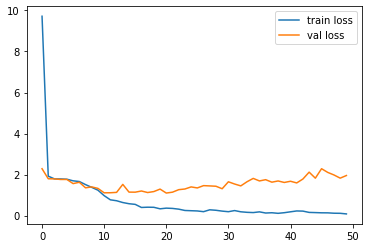

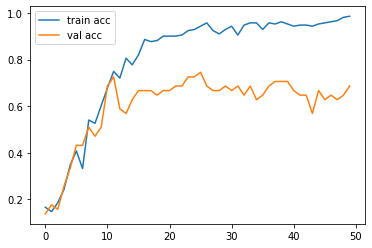

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
# save it as a h5 file


from tensorflow.keras.models import load_model

Classifier.save('model_Classifier.h5')

In [14]:
y_pred = Classifier.predict(test_set)

In [15]:
y_pred

array([[1.12761223e-08, 9.99274313e-01, 7.21313816e-04, 4.22250395e-08,
        7.30609884e-07, 3.51709946e-06],
       [5.77837000e-07, 4.44313288e-02, 8.55859041e-01, 4.52484443e-07,
        9.58794057e-02, 3.82926664e-03],
       [2.14623878e-06, 9.78203479e-06, 9.99981403e-01, 6.67160111e-06,
        1.02755662e-08, 1.01783861e-08],
       [7.34933913e-02, 4.65492100e-01, 3.61830294e-02, 2.83978283e-01,
        1.35949641e-01, 4.90352837e-03],
       [2.03284784e-04, 1.12597164e-07, 3.12192678e-05, 1.34762726e-03,
        2.10568360e-05, 9.98396695e-01],
       [3.38543505e-05, 6.85082341e-07, 1.10036408e-05, 9.99947190e-01,
        2.63110849e-07, 7.06006904e-06],
       [6.06780013e-05, 1.14016893e-05, 2.62155343e-04, 9.99262273e-01,
        7.15705828e-05, 3.31873307e-04],
       [1.44563504e-02, 7.68393278e-04, 1.06925592e-02, 9.77269010e-05,
        9.73772943e-01, 2.12020197e-04],
       [3.36348754e-03, 6.89419985e-01, 1.21503079e-04, 1.38518386e-04,
        3.18559594e-02, 

In [16]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [17]:
y_pred

array([1, 2, 2, 1, 5, 3, 3, 4, 1, 5, 4, 1, 5, 3, 1, 1, 0, 1, 1, 1, 3, 1,
       5, 3, 4, 1, 5, 1, 0, 1, 3, 2, 0, 5, 5, 4, 0, 4, 0, 3, 1, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0])

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [19]:
model=load_model('model_Classifier.h5')

In [29]:
img=image.load_img('/content/drive/MyDrive/Dataset/Dataset/Test/50/27726-10144-18675.jpeg',target_size=(224,224))

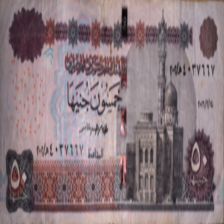

In [30]:
img

In [32]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [33]:
result = Classifier.predict(test_image)
result

array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

In [34]:
a=np.argmax(model.predict(test_image), axis=1)

In [36]:
a==5

array([ True])